In [1]:
from space_exploration.beans.dataset_bean import Dataset
from space_exploration.dataset import db_access
from space_exploration.dataset.normalize.not_normalized import NotNormalized
from space_exploration.dataset.normalize.y_along_component_normalizer import YAlongComponentNormalizer
from space_exploration.models.implementations.A import A
from space_exploration.models.implementations.C import C
from space_exploration.training import train_gan, get_split_datasets, test_gan, gen_output

session = db_access.get_session()
# dataset = Dataset.get_dataset_or_fail(session, "re200-sr001etot")
dataset = Dataset.get_dataset_or_fail(session, "paper-train-normalized")
model = C("C-paper-data")
y_dim = model.prediction_sub_space.y[1]



In [2]:
# model.load("2d6807c5be3b4b189e4aebf4393986b0")
model.load("8a2b09b24fa44383ba5326bb1cb2a10c")

⌛ Fecthing artifact at final_model/checkpoint_latest.pt


✅ Loaded generator from run 8a2b09b24fa44383ba5326bb1cb2a10c


In [3]:
small_ds = dataset.get_training_dataset(NotNormalized(dataset), y_dim, size=300)

⌛ Initializing Dataset...
[########################################] | 100% Completed | 2.06 ss


In [4]:
train_ds, val_ds, test_ds = get_split_datasets(small_ds, batch_size=8, val_ratio=0.2, test_ratio=0.1, device=model.device)

In [5]:
import torch
import matplotlib.pyplot as plt

def plot_hist(target, name):
    # Plot histogram with matplotlib
    plt.figure(figsize=(6, 4))
    plt.hist(target, bins=20, range=(target.min(), target.max()), edgecolor='black')
    plt.title(name)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(True)
    
    plt.show()
    

⌛ Initializing Dataset...
[########################################] | 100% Completed | 8.68 ss


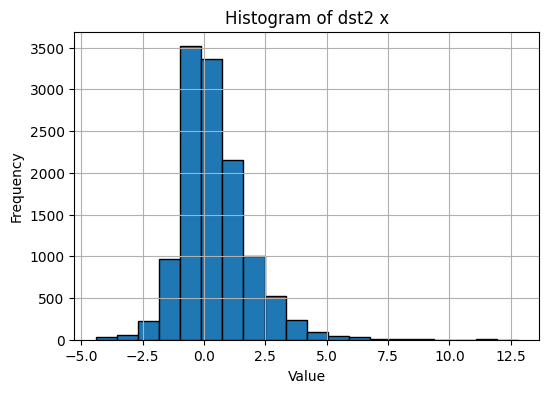

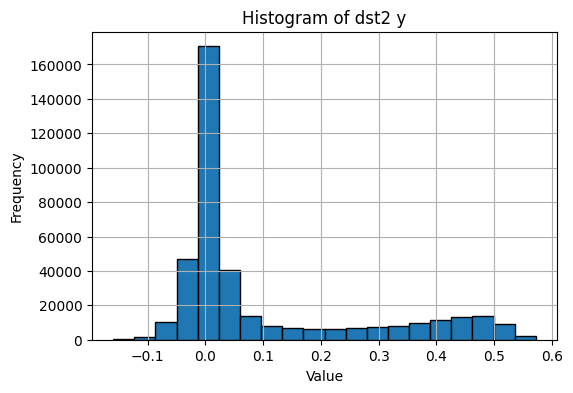

/data3/chancrin/code/3D-GAN/.venv/lib/python3.10/site-packages/dask/_task_spec.py:764: RuntimeWarning: invalid value encountered in divide
  return self.func(*new_argspec)


In [11]:
ds2 = Dataset.get_dataset_or_fail(session, "paper-train")
dst2 = ds2.get_training_dataset(NotNormalized(ds2), y_dim, size=300)
dst2x, dst2y = next(iter(dst2))
plot_hist(dst2x.cpu().numpy().reshape(-1), 'Histogram of dst2 x')
plot_hist(dst2y.cpu().numpy().reshape(-1), 'Histogram of dst2 y')

⌛ Initializing Dataset...
[########################################] | 100% Completed | 9.10 ss


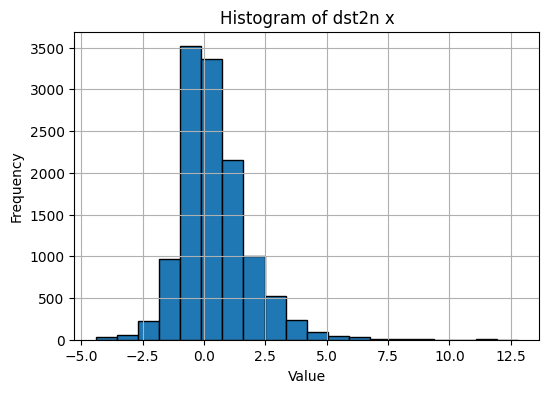

ValueError: supplied range of [nan, nan] is not finite

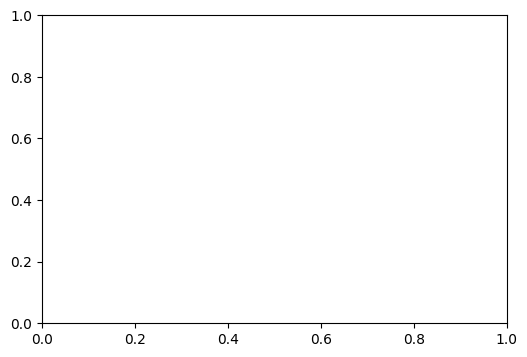

In [12]:
dst2n = ds2.get_training_dataset(YAlongComponentNormalizer(ds2), y_dim, size=300)
dst2nx, dst2ny = next(iter(dst2n))
plot_hist(dst2nx.cpu().numpy().reshape(-1), 'Histogram of dst2n x')
plot_hist(dst2ny.cpu().numpy().reshape(-1), 'Histogram of dst2n y')

In [6]:
x, y = next(iter(test_ds))

gen_y = gen_output(model, x)

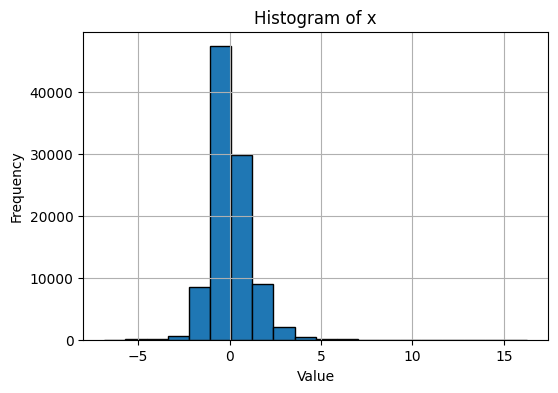

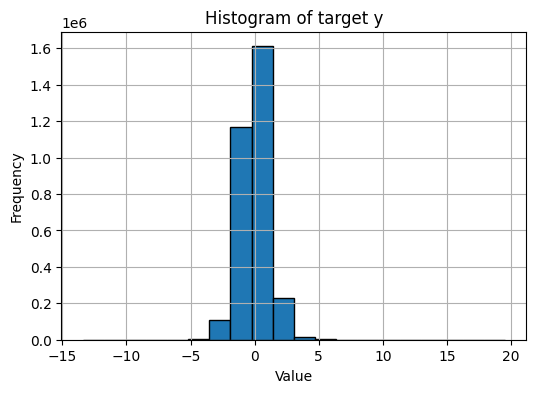

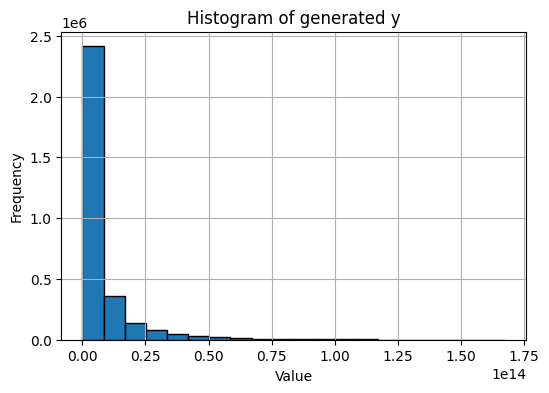

In [13]:

plot_hist(x.cpu().numpy().reshape(-1), 'Histogram of x')
plot_hist(y.cpu().numpy().reshape(-1), 'Histogram of target y')
plot_hist(gen_y.cpu().numpy().reshape(-1), 'Histogram of generated y')

In [8]:
test_gan(model, test_ds)

Testing: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:01<00:00,  3.55it/s]

[Test MSE] 179517729662732446791106560.000000


np.float64(1.7951772966273245e+26)